In [1]:
import os
os.chdir('../../')

import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

RDKit WARNING: [00:50:26] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=False)

drug_encoding = 'MPNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 30, 
                         LR = 0.001, 
                         batch_size = 16,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )
model = models.model_initialize(**config)


Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.18162273
Training at Epoch 1 iteration 100 with loss 0.03262544
Training at Epoch 1 iteration 200 with loss 0.28088984
Training at Epoch 1 iteration 300 with loss 0.18376702
Training at Epoch 1 iteration 400 with loss 0.4720042
Training at Epoch 1 iteration 500 with loss 0.12979831
Training at Epoch 1 iteration 600 with loss 0.19930425
Training at Epoch 1 iteration 700 with loss 0.1931547
Training at Epoch 1 iteration 800 with loss 0.29235488
Training at Epoch 1 iteration 900 with loss 0.19123395
Training at Epoch 1 iteration 1000 with loss 0.15141267
Training at Epoch 1 iteration 1100 with loss 0.18739717
Training at Epoch 1 iteration 1200 with loss 0.061301395
Training at Epoch 1 iteration 1300 with loss 0.25031063
Validation at Epoch 1 , MSE: 0.3274485154008011 , Pearson Correlation: 0.7518610210370498 with p-value: 0.0 , Concordance Index: 0.8431469564086888
Training at Epoch 2 iteration 0 

Training at Epoch 10 iteration 0 with loss 0.09310202
Training at Epoch 10 iteration 100 with loss 0.18881153
Training at Epoch 10 iteration 200 with loss 0.096591875
Training at Epoch 10 iteration 300 with loss 0.50756043
Training at Epoch 10 iteration 400 with loss 0.07353314
Training at Epoch 10 iteration 500 with loss 0.6968722
Training at Epoch 10 iteration 600 with loss 0.6715472
Training at Epoch 10 iteration 700 with loss 0.3452581
Training at Epoch 10 iteration 800 with loss 0.5682747
Training at Epoch 10 iteration 900 with loss 0.37323463
Training at Epoch 10 iteration 1000 with loss 0.11767764
Training at Epoch 10 iteration 1100 with loss 0.19793227
Training at Epoch 10 iteration 1200 with loss 0.2784537
Training at Epoch 10 iteration 1300 with loss 0.6282196
Validation at Epoch 10 , MSE: 0.29907184180309143 , Pearson Correlation: 0.7785231135766093 with p-value: 0.0 , Concordance Index: 0.8573692102544642
Training at Epoch 11 iteration 0 with loss 0.04040824
Training at Epo

Validation at Epoch 18 , MSE: 0.30469911655537024 , Pearson Correlation: 0.7733982739891384 with p-value: 0.0 , Concordance Index: 0.8607292127843484
Training at Epoch 19 iteration 0 with loss 0.049213365
Training at Epoch 19 iteration 100 with loss 0.21890602
Training at Epoch 19 iteration 200 with loss 0.10918429
Training at Epoch 19 iteration 300 with loss 0.46962386
Training at Epoch 19 iteration 400 with loss 0.09832353
Training at Epoch 19 iteration 500 with loss 0.27338734
Training at Epoch 19 iteration 600 with loss 0.1602433
Training at Epoch 19 iteration 700 with loss 0.11781935
Training at Epoch 19 iteration 800 with loss 0.056241885
Training at Epoch 19 iteration 900 with loss 0.087722026
Training at Epoch 19 iteration 1000 with loss 0.1243666
Training at Epoch 19 iteration 1100 with loss 0.11407921
Training at Epoch 19 iteration 1200 with loss 0.091633745
Training at Epoch 19 iteration 1300 with loss 0.19156292
Validation at Epoch 19 , MSE: 0.32281963115546075 , Pearson Co

Training at Epoch 27 iteration 1100 with loss 0.17451991
Training at Epoch 27 iteration 1200 with loss 0.2964872
Training at Epoch 27 iteration 1300 with loss 0.27980348
Validation at Epoch 27 , MSE: 0.305921219399845 , Pearson Correlation: 0.7815690648189262 with p-value: 0.0 , Concordance Index: 0.8610707032375491
Training at Epoch 28 iteration 0 with loss 0.3437407
Training at Epoch 28 iteration 100 with loss 0.079807535
Training at Epoch 28 iteration 200 with loss 0.6265162
Training at Epoch 28 iteration 300 with loss 0.056284208
Training at Epoch 28 iteration 400 with loss 0.21211028
Training at Epoch 28 iteration 500 with loss 0.46807632
Training at Epoch 28 iteration 600 with loss 0.55382514
Training at Epoch 28 iteration 700 with loss 0.30266973
Training at Epoch 28 iteration 800 with loss 0.34189954
Training at Epoch 28 iteration 900 with loss 0.030159222
Training at Epoch 28 iteration 1000 with loss 0.26034155
Training at Epoch 28 iteration 1100 with loss 0.25772482
Training 

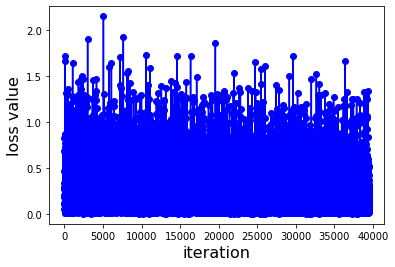

In [4]:
model.train(train, val, test)

In [5]:
model.save_model('./model_GraphDTI')